In [15]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *
from keras.layers import Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

df = pandas.read_csv('http://pogo.software/me4ml/dataset1.csv')

Epoch 1/300
57/57 [==============================] - 1s 5ms/step - loss: 0.4443 - accuracy: 0.7961 - val_loss: 0.7351 - val_accuracy: 0.5350
Epoch 2/300
57/57 [==============================] - 0s 3ms/step - loss: 0.3965 - accuracy: 0.8233 - val_loss: 0.5865 - val_accuracy: 0.6850
Epoch 3/300
57/57 [==============================] - 0s 4ms/step - loss: 0.3921 - accuracy: 0.8244 - val_loss: 0.4994 - val_accuracy: 0.7450
Epoch 4/300
57/57 [==============================] - 0s 4ms/step - loss: 0.3834 - accuracy: 0.8217 - val_loss: 0.4583 - val_accuracy: 0.8000
Epoch 5/300
57/57 [==============================] - 0s 3ms/step - loss: 0.3880 - accuracy: 0.8267 - val_loss: 0.4500 - val_accuracy: 0.8150
Epoch 6/300
57/57 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.8306 - val_loss: 0.4429 - val_accuracy: 0.8050
Epoch 7/300
57/57 [==============================] - 0s 3ms/step - loss: 0.3878 - accuracy: 0.8189 - val_loss: 0.4425 - val_accuracy: 0.8150
Epoch 8/300
5

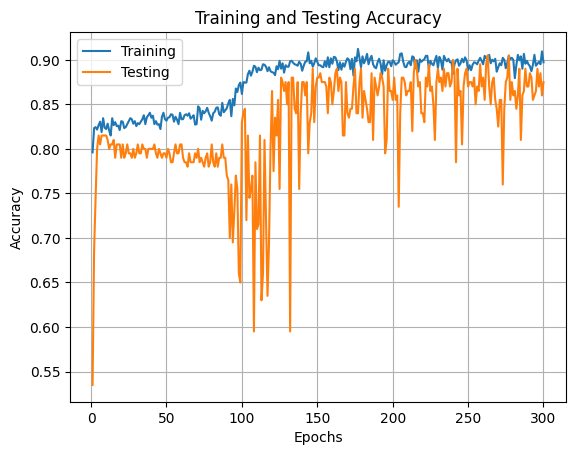

In [38]:
np.random.seed(0)

# importing all the data into arrays from the csv
Arm_len = np.array(df['Arm length (m)'][:])
Ball_wei = np.array(df['Ball weight (kg)'][:])
Ball_rad = np.array(df['Ball radius (mm)'][:])
Air_temp = np.array(df['Air temperature (deg C)'][:])
Spring_const = np.array(df['Spring constant (N per m)'][:])
Device_weight = np.array(df['Device weight (kg)'][:])

## combine these parameters into a single variable
X = np.column_stack((Arm_len, Ball_wei, Ball_rad, Air_temp, Spring_const, Device_weight))
Yt = np.array(df['Target hit'][:]) # classes

## scaling each of the parameters
n = len(X[0,:])
X_scale = np.zeros((2,6))
for i in range(0,n):
    X_scale[0,i] = np.mean(X[:,0])
    X_scale[1,i] = np.std(X[:,0])

np.savetxt('jp1120-1.txt',X_scale)

X = (X-X_scale[0,:])/X_scale[1,:]

# creating testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(X,Yt,test_size=0.1)

# Set up a sequential neural network
model = Sequential()

# set up the layers
model.add(Dense(units=8, activation='relu', input_shape=(6,)))
model.add(BatchNormalization())
model.add(Dense(units=4, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=2, activation='softmax'))

opt = Adam(learning_rate=0.001)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])



# input the data
data = model.fit(X_train, y_train, epochs=300, batch_size=32,validation_data=(X_test, y_test))

model.save('jp1120-1.h5')

# testing the model
Yt_predict = model.predict(X)

train_accuracy = data.history['accuracy']
test_accuracy = data.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, label='Training')
plt.plot(epochs, test_accuracy, label='Testing')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

Yt = to_categorical(Yt)

# finding the number of correct paramters
number_correct = 0
for i in range(len(Yt)):
    if np.round(Yt[i, 0]) == np.round(Yt_predict[i, 0]):
        number_correct += 1

fraction_correct = 1.0 * number_correct / len(Yt_predict)

print(fraction_correct)